In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import minimize




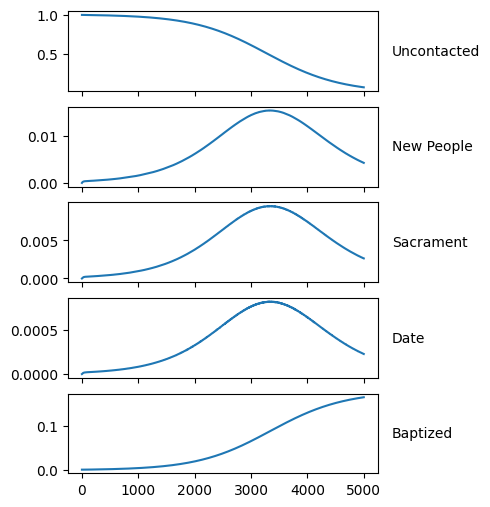

In [2]:
init_members = 5 * 4 * 150
population = 3_000_000
init_U = population - init_members
α = (100 * population) / (init_U * init_members)  # Rate going from Date to Baptized
β = 1 / 3  # Rate going from New People to Sacrament
γ = 1 / 20  # Rate going from Sacrament to Date
δ = 1 / 12  # Rate going from Date to Baptized
ε = 1 / 2  # Rate going from Date to Sacrament
ζ = 1 / 2  # Rate going from Sacrament to Teaching
η = 1 / 15  # Rate going from Teaching to Uncontacted


def unsdb(t, y):
    # Unconctacted, New People, Sacrament Attendance, Date, Baptized
    U, N, S, D, B = y
    return np.array(
        [
            η * N - α * B * U,  # U'
            α * B * U + ζ * S - (β + η) * N,  # N'
            β * N + ε * D - (δ + ζ) * S,  # S'
            γ * S - (δ + ε) * D,  # D'
            δ * D,  # B'
        ]
    )


t0 = 0
tf = 5000
# Initially 5 people are infected
y0 = np.array(
    [init_U / population, 0, 0, 0, init_members / population]
)

# Solve
sol = solve_ivp(unsdb, (t0, tf), y0, t_eval=np.linspace(t0, tf, 2000))

labels = ["Uncontacted", "New People", "Sacrament", "Date", "Baptized"]
	
fig, axes = plt.subplots(5, figsize=(4, 6), gridspec_kw={'wspace': 0.5})

for ax, label, i in zip(axes, labels, range(len(labels))):
    ax.plot(sol.t, sol.y[i])
    ax.ticklabel_format(style='plain')
    ax.annotate(label, xy=(1, 0.5), xycoords='axes fraction', 
                xytext=(10, 0), textcoords='offset points',
                ha='left', va='center', fontsize=10)  # Adjust text position
    if ax != axes[-1]:  # Check if it's not the bottom subplot
        ax.label_outer()  # Hide x-axis labels and ticks

plt.show()
